In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import correlate
import os
import heapq
arr = np.load("./PEMS04/pems04.npz")
print(dir(arr))
for key in arr.keys():
    print(key)
#print(arr['data'])


['__abstractmethods__', '__class__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_files', 'allow_pickle', 'close', 'f', 'fid', 'files', 'get', 'items', 'iteritems', 'iterkeys', 'keys', 'pickle_kwargs', 'values', 'zip']
data


In [2]:
arr['data'].shape

(16992, 307, 3)

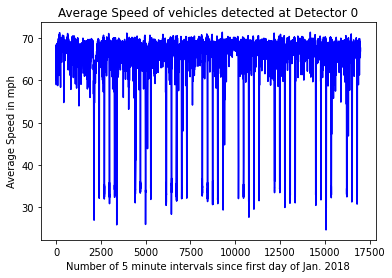

In [3]:
# Third entry in the 3D array contains average speed - every 5 minutes between observations.
# In major metropolitan areas of California.
# 307 detectors
detector = 0
avg_speed_pems4 = plt.plot(list(range(len(arr['data'][:,0]))),arr['data'][:,detector,2], color="blue")
pems4_speed_title = plt.title("Average Speed of vehicles detected at Detector {}".format(detector))
pems4_speed_x = plt.xlabel("Number of 5 minute intervals since first day of Jan. 2018")
pems4_speed_y = plt.ylabel("Average Speed in mph")

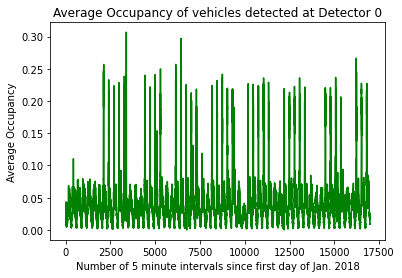

In [4]:
# Second entry - occupancy - fraction of time a vehicle is over a detector.
detector = 0
pems4_occupancy_title = plt.title("Average Occupancy of vehicles detected at Detector {}".format(detector))
pems4_occupancy_x = plt.xlabel("Number of 5 minute intervals since first day of Jan. 2018")
pems4_occupancy_y = plt.ylabel("Average Occupancy")
pems4_occupancy = plt.plot(list(range(len(arr['data'][:,0]))),arr['data'][:,detector,1],color="green")

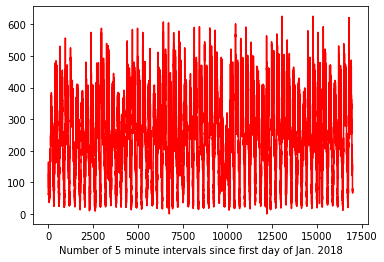

In [5]:
# First entry - flow - number of vehicles passing over the detector in 30 second period.
# 

pems4_flow = plt.plot(list(range(len(arr['data'][:,0]))),arr['data'][:,0,0],color="red")
pems4_flow_x = plt.xlabel("Number of 5 minute intervals since first day of Jan. 2018")
pems4_flow_y = plt.ylabel("")

In [6]:
arr_pems8 = np.load("./PEMS08/pems08.npz")
pems8_data = arr_pems8["data"]

In [82]:
def ma(ts,window):
    ts_points = []
    for i in range(window,len(ts)):
        ts_points.append(np.sum(ts[(i-window):i])/window)
    return ts_points

def norm(vec):
    return np.sqrt(np.sum([x**2 for x in vec]))

def cosine_sim(vec1,vec2):
    return np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))

def deltas(vec):
    diffs = []
    for i in range(1,len(vec)):
        diffs.append(vec[i]-vec[i-1])
    return diffs
# cosine similarity between pairwise difference vectors (x_i-x_{i-1})
def most_similar_segments(start_idx,end_idx,ts,k,compute_diff=True,avg_diff=False):
    cmp_window = ts[start_idx:end_idx]
    if compute_diff:
        cmp_window = deltas(cmp_window)
    window_size = end_idx-start_idx
    L = []
    heapq.heapify(L)
    num_segments = 0
    sim_to_region = dict()
    for i in range(window_size,len(ts),window_size):
        segment = ts[(i-window_size):i]
        if compute_diff:
            segment = deltas(segment)
        if avg_diff:
            sim = np.sum(np.array(cmp_window)-np.array(segment))/len(cmp_window)
        else:
            sim = correlate(cmp_window,segment)[0]
            #sim = cosine_sim(cmp_window,segment)
        sim = round(sim,6)
        if num_segments < k:
            sim_to_region[sim] = list(range(i-window_size,i))
            heapq.heappush(L,sim)
            num_segments += 1
        else:
            least_sim_largest_dist = heapq.nlargest(1,L)[0]
            if sim > least_sim_largest_dist: # number of segments exceeds k
                sim_to_region[sim] = list(range(i-window_size,i))
                heapq.heappush(L,sim)
                if least_sim_largest_dist in sim_to_region:
                    del sim_to_region[least_sim_largest_dist]
                    heapq.heappushpop(L,least_sim_largest_dist)
    
    return list(sim_to_region.values())

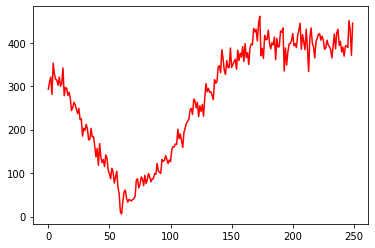

In [83]:
# list(pems8_data[:,0,2])[250:375]
plt.plot(list(range(250)),pems8_data[250:500,0,0],color="red")

In [84]:
# PEMS08 average speeds
sim_segs = most_similar_segments(250,500, list(pems8_data[:,0,2]),20)

In [13]:
# we can only add to interval tree if there's no overlap.

class IntervalTreeNode:
    def __init__(self,mx,left,right,interval):
        self.mx = mx
        self.left = left
        self.right = right
        self.interval = interval

def insert(root,node):
    temp = root
    insert_helper(temp,node)
def insert_helper(curr_node,node_to_add):
    if curr_node is not None:
        pass
    for i in range(len(sim_segs)):
        node_to_add = IntervalTreeNode(interval[0],left,right,)
        if T is None:
            pass
#             T = insert_helper(, node_to_add)
        else:
            pass
#             T = insert_helper(, node_to_add)

In [85]:
sim_segs_all = [[idx for idx in seg] for seg in sim_segs]

In [86]:
sim_segs_idx = [idx for seg in sim_segs for idx in seg]

In [87]:
print(len(set(pems8_data[sim_segs_idx,0,0])))
print(len(pems8_data[sim_segs_idx,0,0]))

496
5000


ValueError: x and y must have same first dimension, but have shapes (250,) and (4250,)

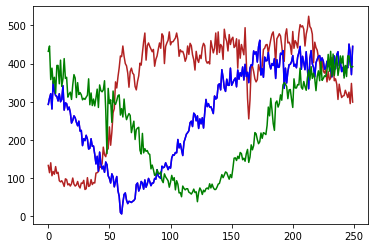

In [88]:
sim_segments = list(zip(sim_segs_idx,pems8_data[sim_segs_idx,0,2]))
plt.plot(list(range(250)),pems8_data[250:500,0,0],color="purple")
plt.plot(list(range(250)),pems8_data[sim_segs_idx,0,0][:250],color="firebrick")
plt.plot(list(range(250)),pems8_data[sim_segs_idx,0,0][250:500],color="b")
plt.plot(list(range(250)),pems8_data[sim_segs_idx,0,0][500:750],color="g")
plt.plot(list(range(250)),pems8_data[sim_segs_idx,0,0][750:],color="y")
#+sim_segments[125:250]+["b"]+sim_segments[250:]+["g"]))

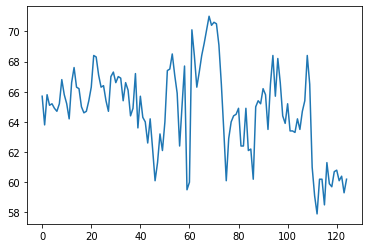

In [70]:
plt.plot(list(range(len(pems8_data[250:375,0,2]))),pems8_data[250:375,0,2])

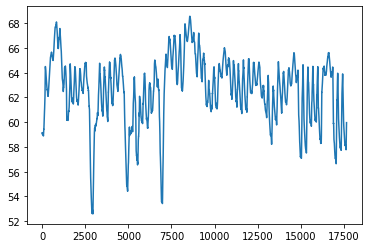

In [61]:
pems8_ma = ma(pems8_data[:,0,2],200)
plt.plot(list(range(len(pems8_ma))),pems8_ma)

In [ ]:
incomplete_highways_england_data = pd.read_csv("../")

In [13]:
predictions_ASTGCN = np.load('output_epoch_65_test.npz')

In [18]:
# Keys within the predictions output
for key in predictions_ASTGCN.keys():
    print(key)

input
prediction
data_target_tensor


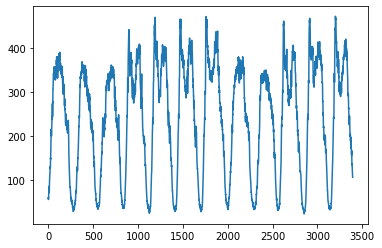

In [34]:
detector = 0
predicted_ts = predictions_ASTGCN["prediction"][:,detector,2]
prediction_plt = plt.plot(list(range(len(predicted_ts))),predicted_ts)

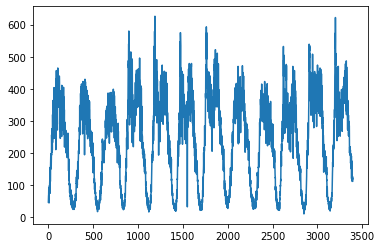

In [36]:
detector = 0
true_ts = predictions_ASTGCN["data_target_tensor"][:,detector,2]
plt.plot(list(range(len(true_ts))),true_ts)

In [33]:
def pairwise_diff(vec1,vec2):
    assert type(vec1) == type(vec2) and type(vec1) == np.ndarray
    return vec1-vec2

In [37]:
diffs = pairwise_diff(np.array(true_ts),np.array(predicted_ts))

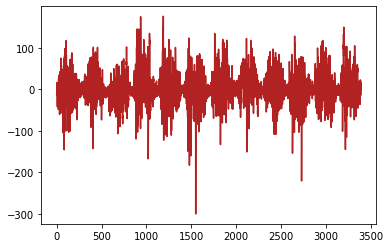

In [39]:
plt.plot(list(range(len(diffs))),diffs,color="firebrick")